## Level 9: Unit sales of all products, agregated for each store and department 

In [1]:
import os
import numpy as np
import pandas as pd
import lightgbm as lgb
from tsforest.forecaster import LightGBMForecaster

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

/home/turing/miniconda/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



In [2]:
data = pd.read_parquet("../input/train_dataframe.parquet")

In [3]:
data.columns

Index(['ts_id', 'item_id', 'dept_id', 'cat_id', 'store_id', 'state_id', 'q',
       'ds', 'event_name_1', 'event_type_1', 'event_name_2', 'event_type_2',
       'sell_price', 'regular_price', 'discount', 'discount_porc', 'snap',
       'lag28', 'lag28_mean7', 'lag28_mean30', 'lag28_mean60', 'lag28_mean90',
       'lag28_mean180', 'lag28_std7', 'lag28_std30'],
      dtype='object')

In [4]:
data = (data
        .groupby(["store_id","dept_id","ds"])
        .agg({"cat_id":lambda x: int(x.unique()),
              "state_id":lambda x: int(x.unique()),
              "q":"sum",
              "event_name_1":lambda x: int(x.unique()),
              "event_type_1":lambda x: int(x.unique()),
              #"event_name_2":lambda x: int(x.unique()),
              #"event_type_2":lambda x: int(x.unique()),
              "discount_porc":"sum",
              "snap":lambda x: int(x.unique()),
              "lag28":"sum",
              "lag28_mean7":"sum",
              "lag28_mean30":"sum",
              "lag28_mean60":"sum",
              "lag28_mean90":"sum",
              "lag28_mean180":"sum"})
        .reset_index()
       )

In [5]:
data["store_id"] = data.store_id.astype(np.int64)
data["dept_id"] = data.dept_id.astype(np.int64)

In [9]:
df = data.query("store_id == 1 & dept_id == 1")

####################################################################################################
store_id: 1 & dept_id: 1


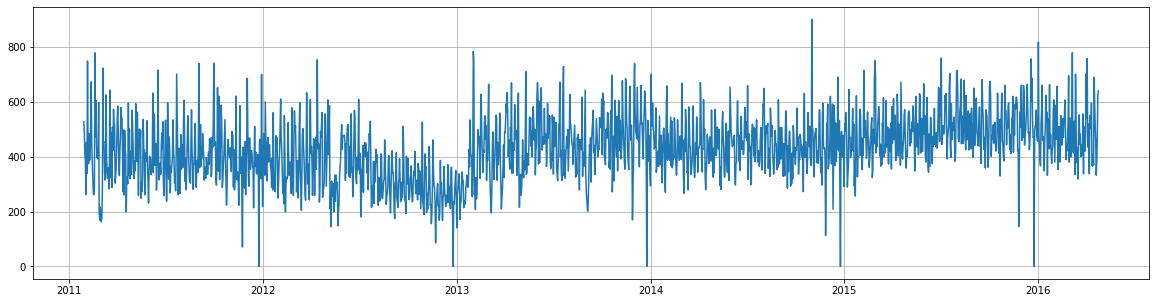

####################################################################################################
store_id: 1 & dept_id: 2


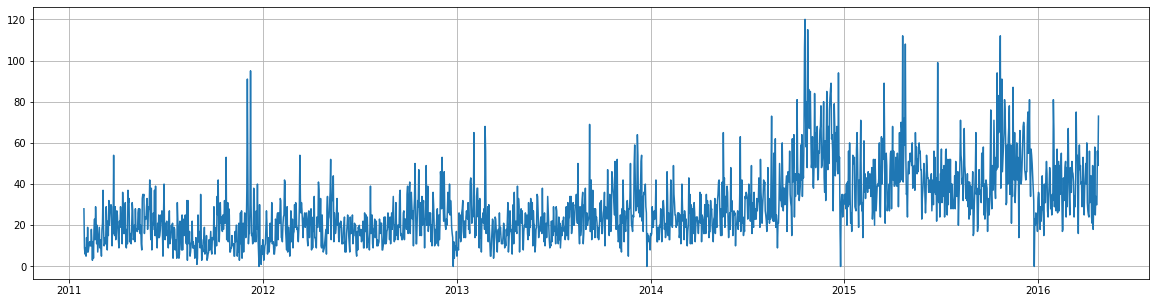

####################################################################################################
store_id: 1 & dept_id: 3


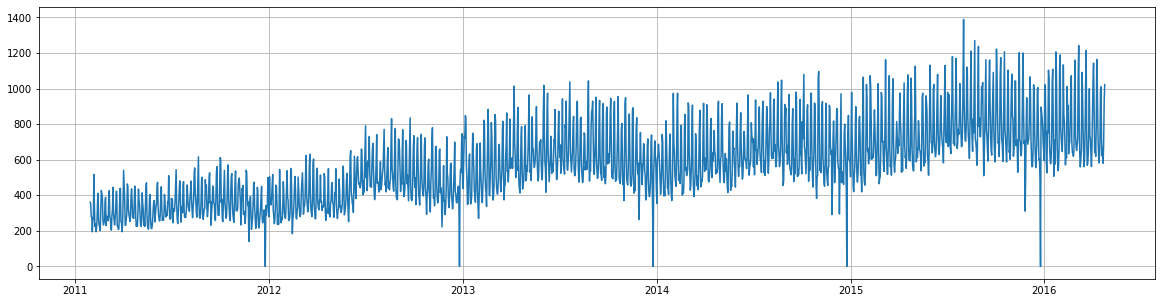

####################################################################################################
store_id: 1 & dept_id: 4


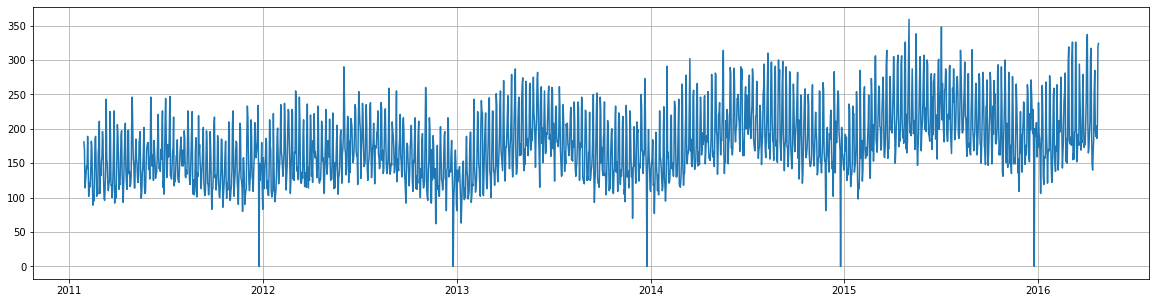

####################################################################################################
store_id: 1 & dept_id: 5


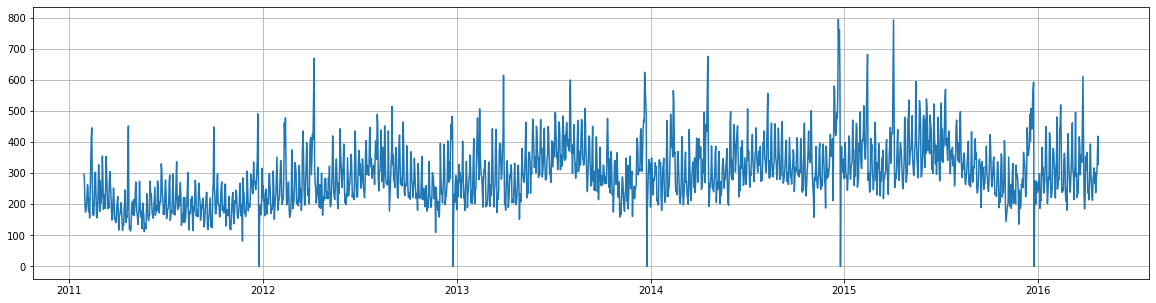

####################################################################################################
store_id: 1 & dept_id: 6


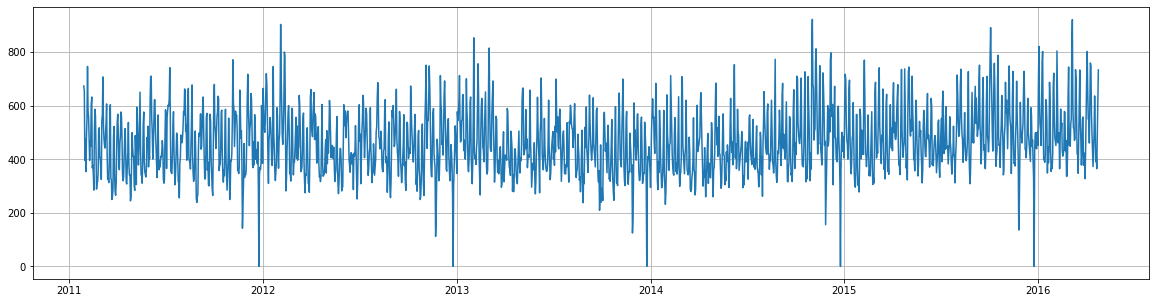

####################################################################################################
store_id: 1 & dept_id: 7


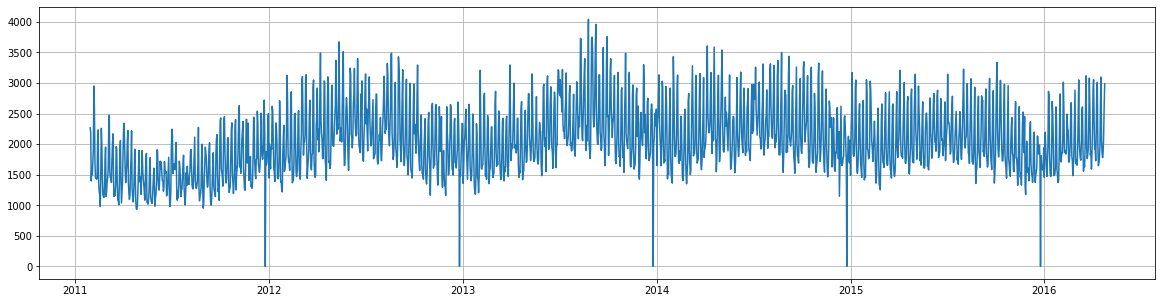

####################################################################################################
store_id: 2 & dept_id: 1


####################################################################################################
store_id: 2 & dept_id: 2


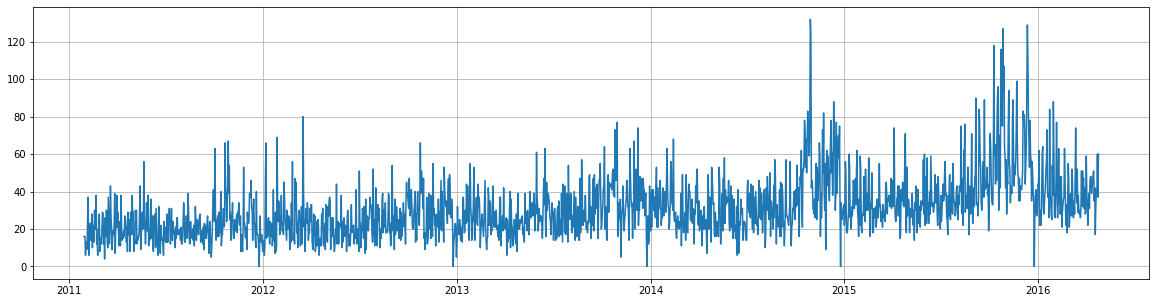

####################################################################################################
store_id: 2 & dept_id: 3


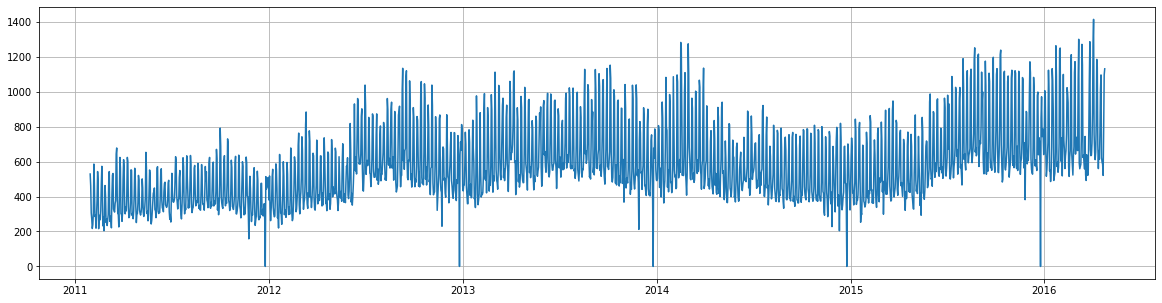

####################################################################################################
store_id: 2 & dept_id: 4


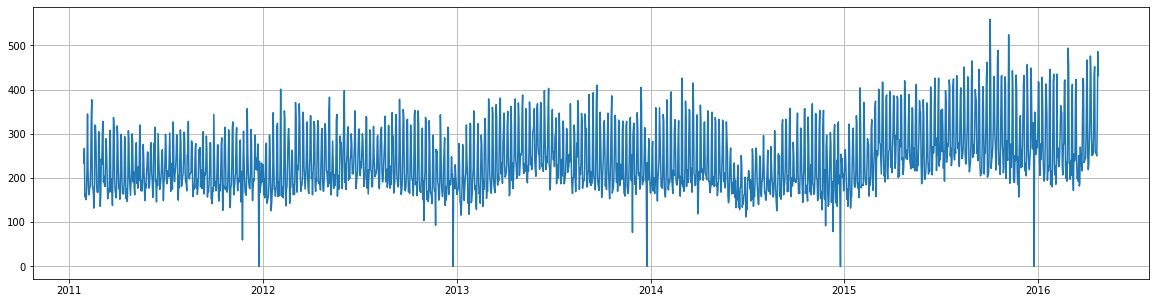

####################################################################################################
store_id: 2 & dept_id: 5


####################################################################################################
store_id: 2 & dept_id: 6


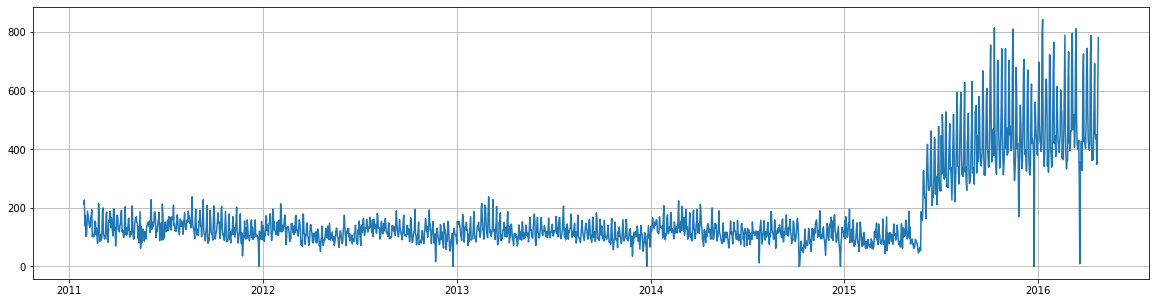

####################################################################################################
store_id: 2 & dept_id: 7


####################################################################################################
store_id: 3 & dept_id: 1


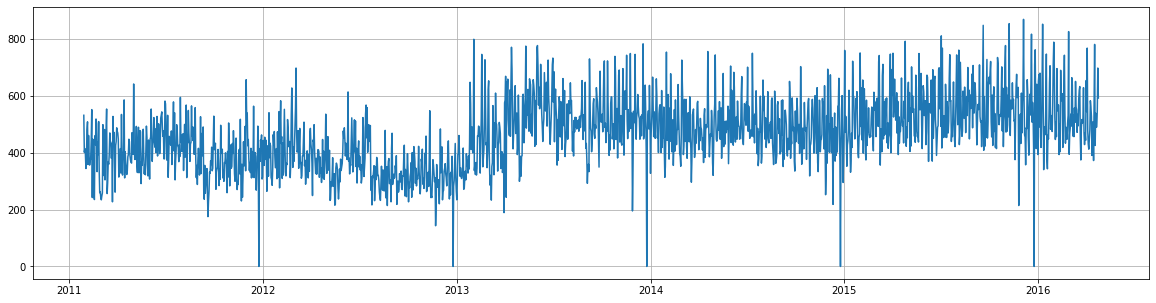

####################################################################################################
store_id: 3 & dept_id: 2


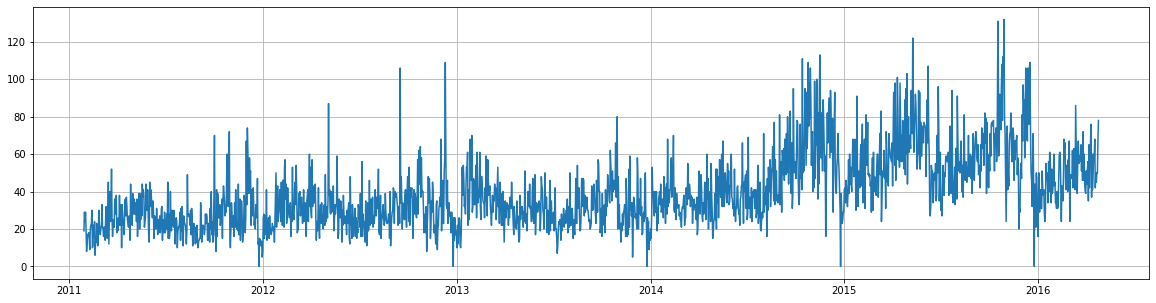

####################################################################################################
store_id: 3 & dept_id: 3


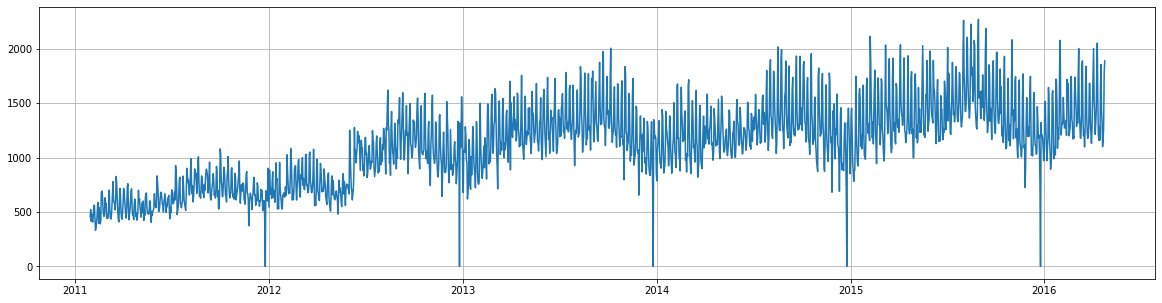

####################################################################################################
store_id: 3 & dept_id: 4


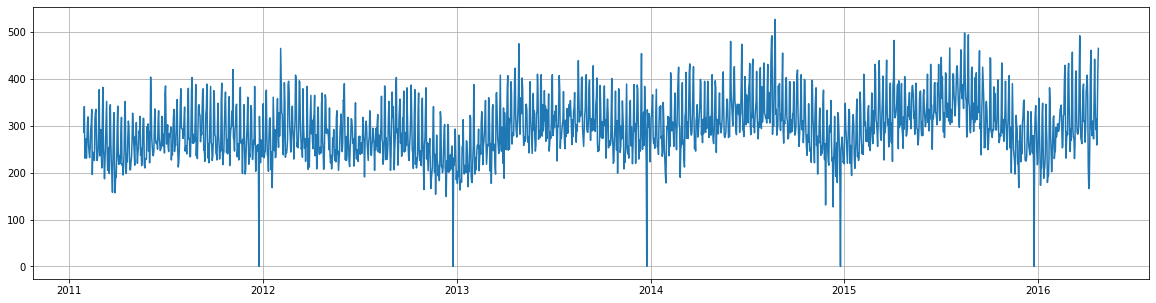

####################################################################################################
store_id: 3 & dept_id: 5


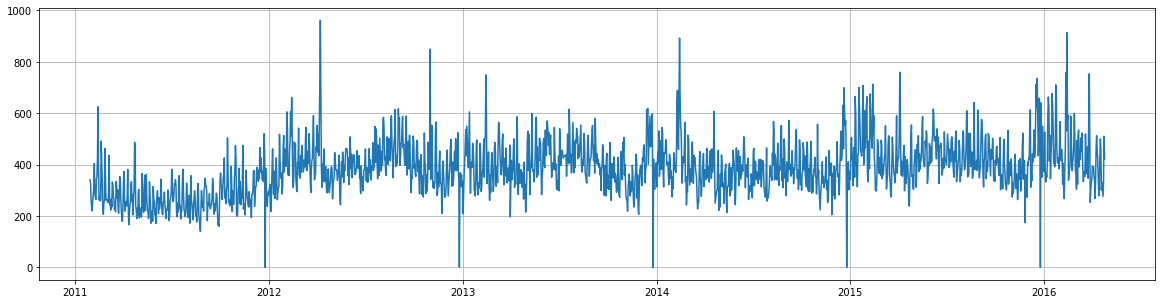

####################################################################################################
store_id: 3 & dept_id: 6


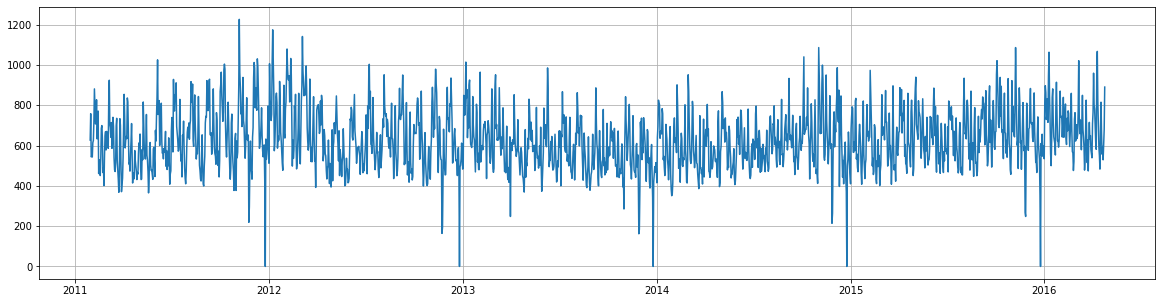

####################################################################################################
store_id: 3 & dept_id: 7


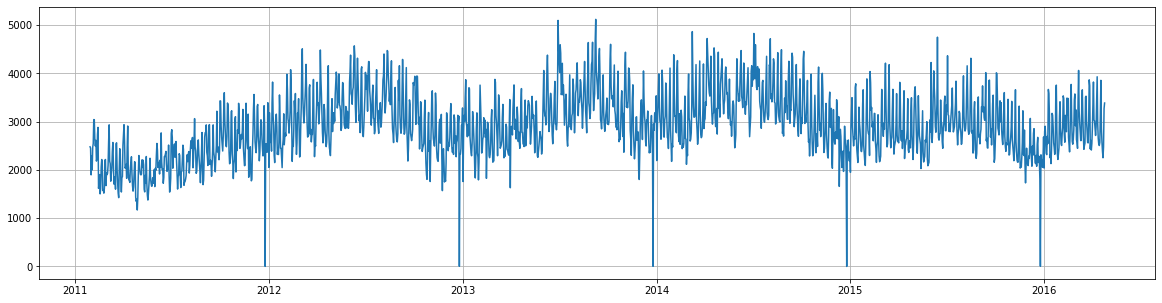

####################################################################################################
store_id: 4 & dept_id: 1


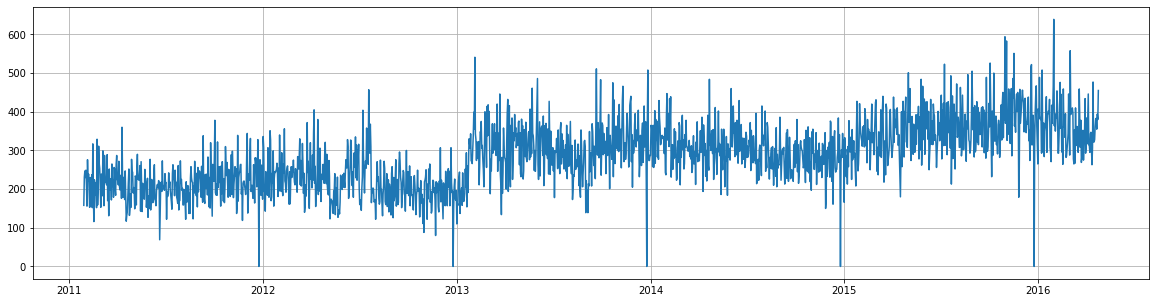

####################################################################################################
store_id: 4 & dept_id: 2


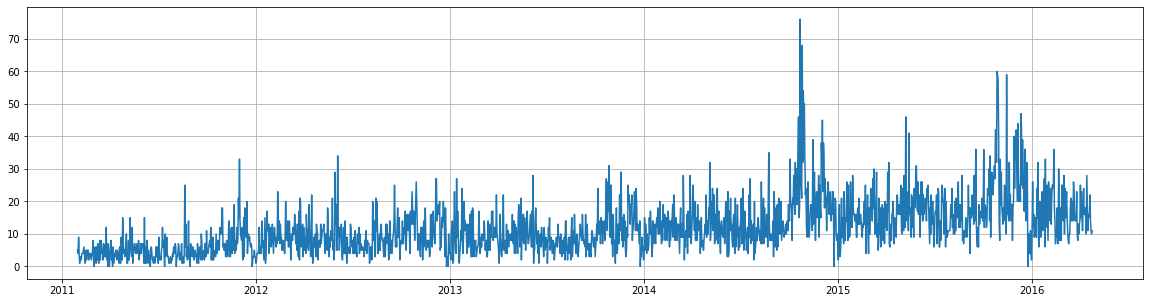

####################################################################################################
store_id: 4 & dept_id: 3


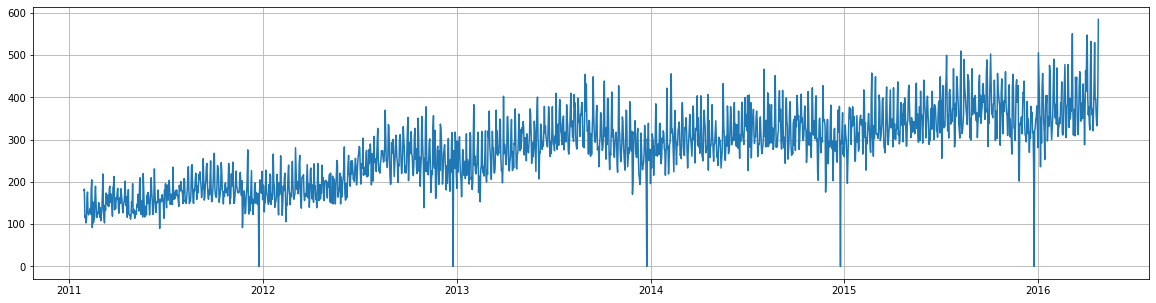

####################################################################################################
store_id: 4 & dept_id: 4


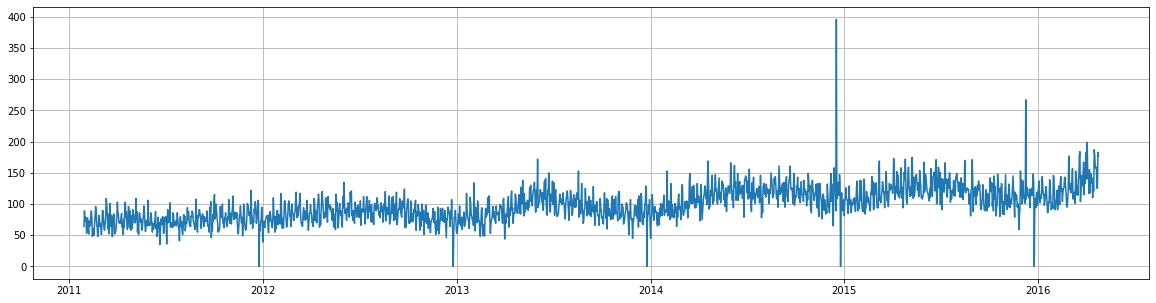

####################################################################################################
store_id: 4 & dept_id: 5


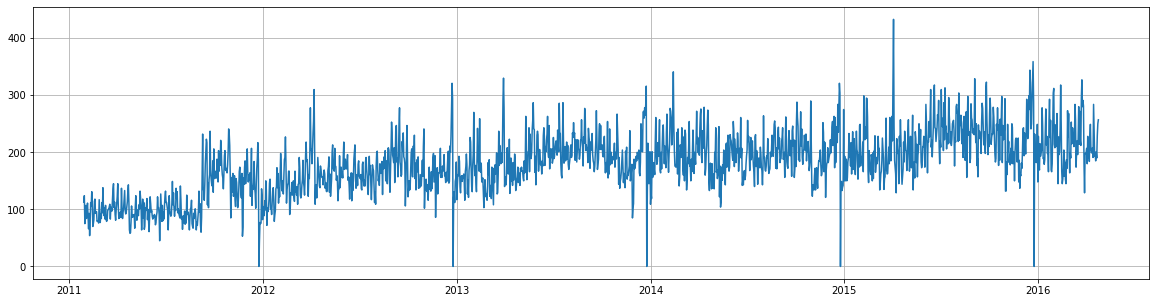

####################################################################################################
store_id: 4 & dept_id: 6


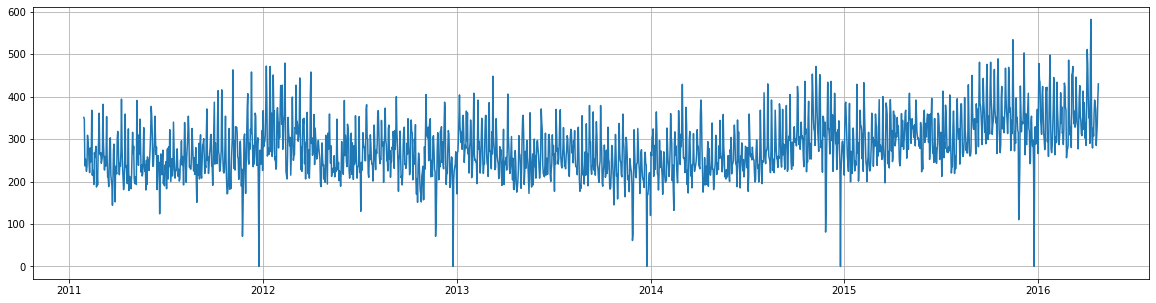

####################################################################################################
store_id: 4 & dept_id: 7


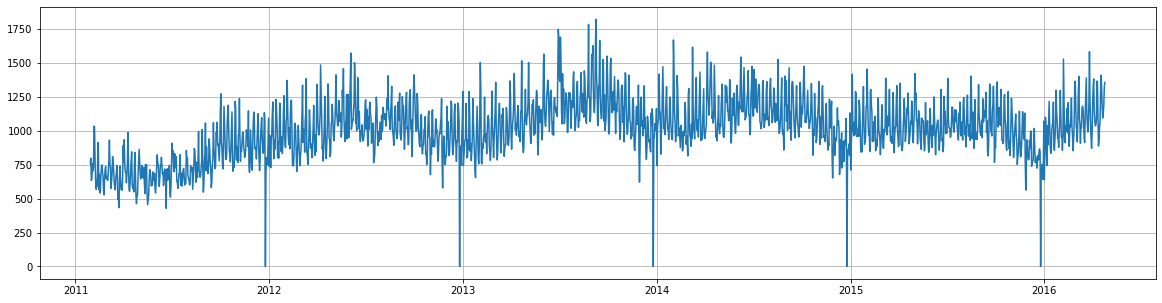

####################################################################################################
store_id: 5 & dept_id: 1


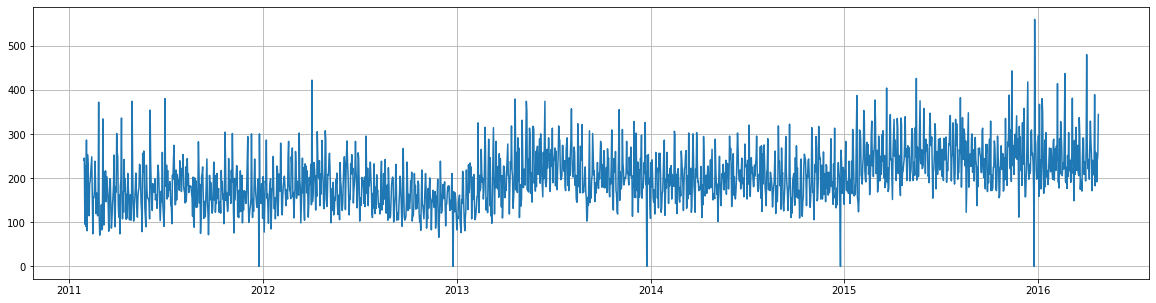

####################################################################################################
store_id: 5 & dept_id: 2


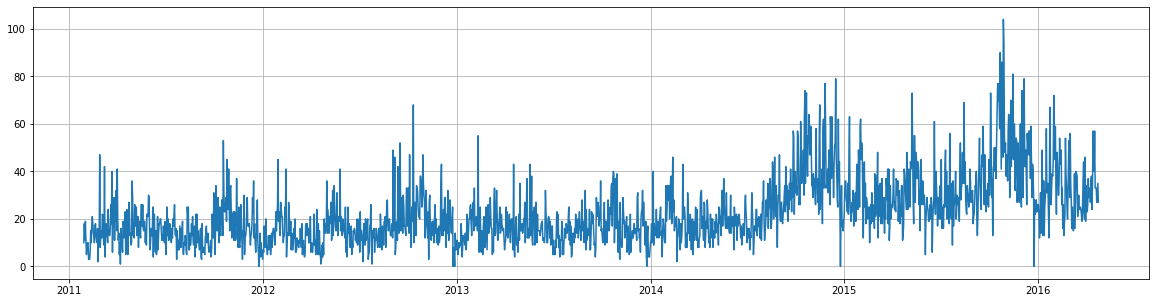

####################################################################################################
store_id: 5 & dept_id: 3


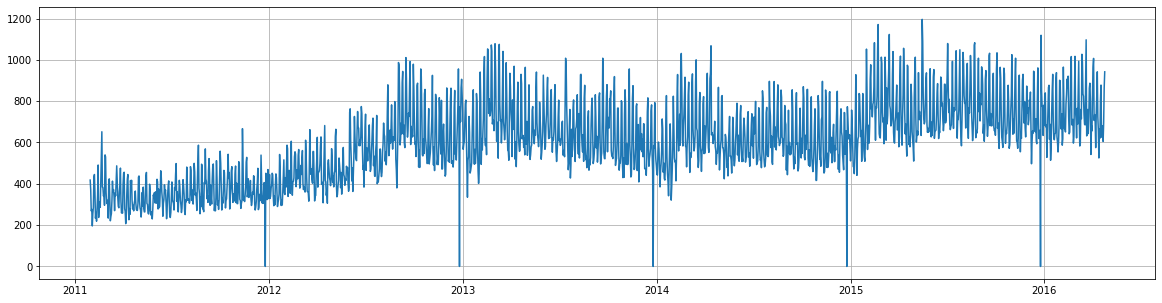

####################################################################################################
store_id: 5 & dept_id: 4


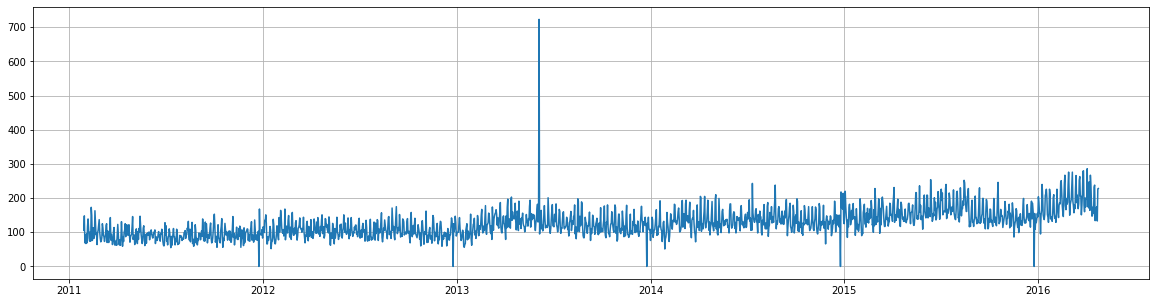

####################################################################################################
store_id: 5 & dept_id: 5


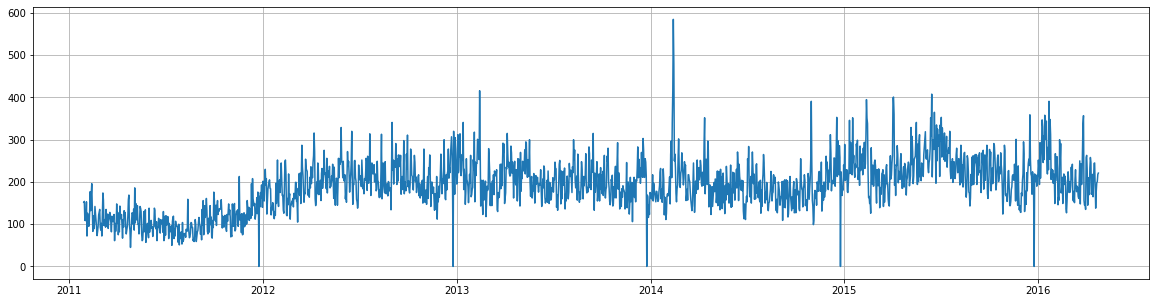

####################################################################################################
store_id: 5 & dept_id: 6


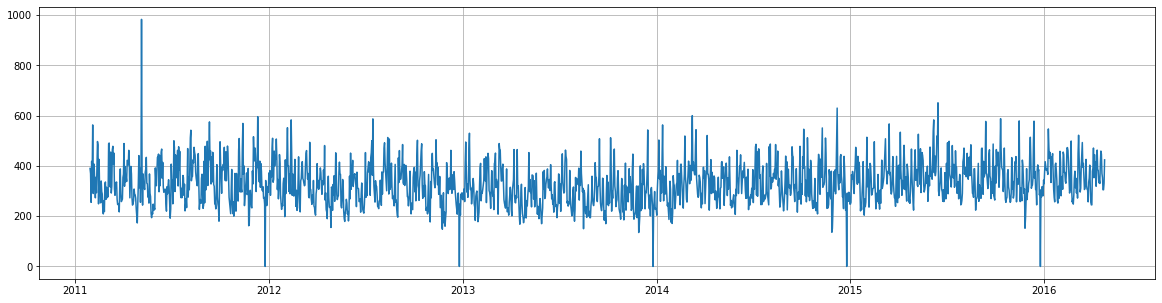

####################################################################################################
store_id: 5 & dept_id: 7


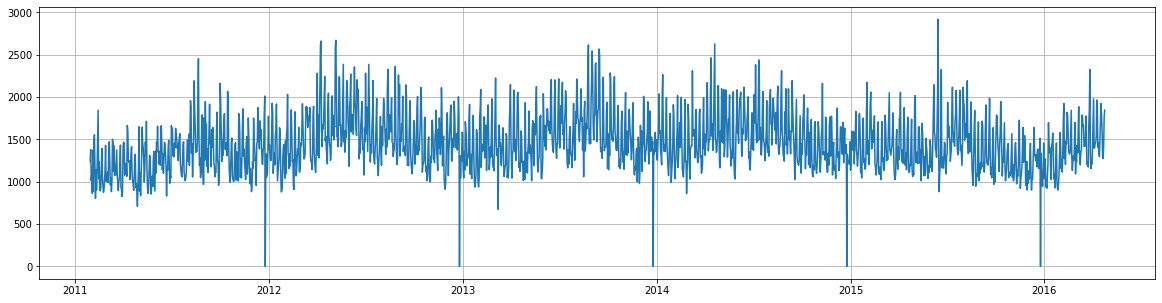

####################################################################################################
store_id: 6 & dept_id: 1


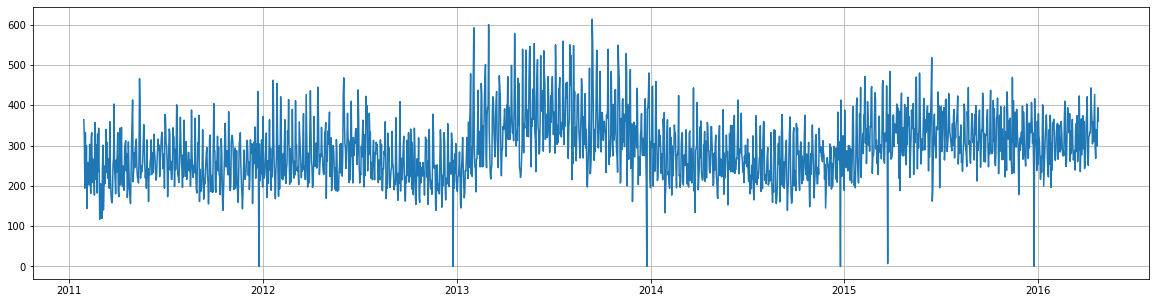

####################################################################################################
store_id: 6 & dept_id: 2


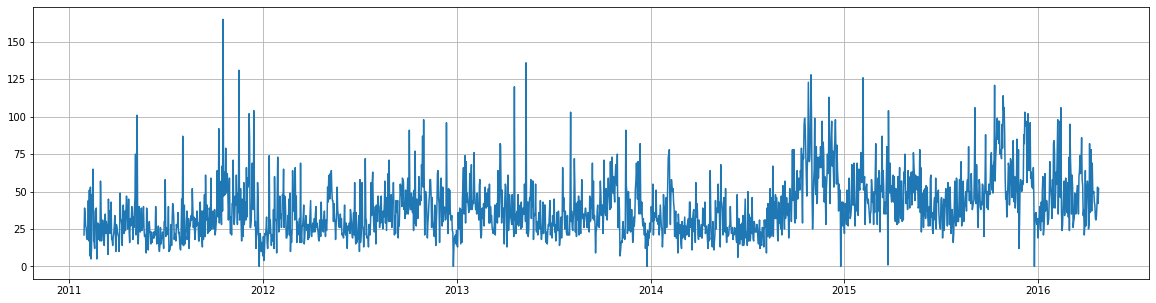

####################################################################################################
store_id: 6 & dept_id: 3


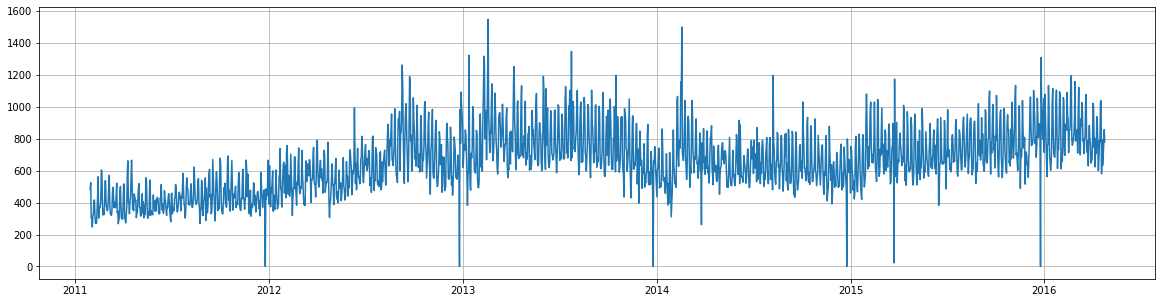

####################################################################################################
store_id: 6 & dept_id: 4


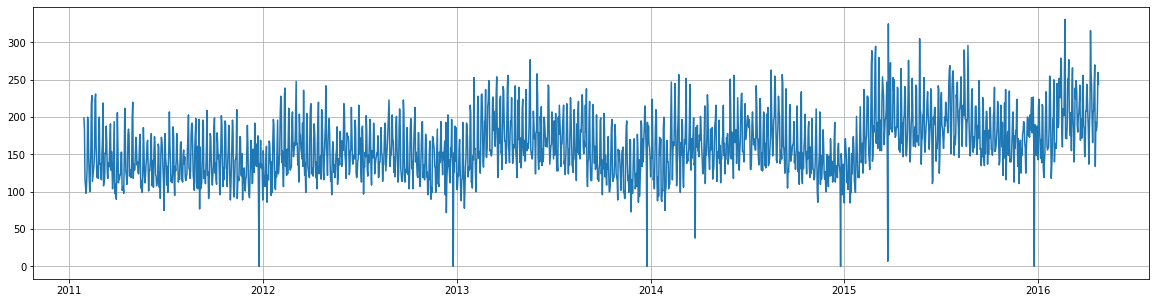

####################################################################################################
store_id: 6 & dept_id: 5


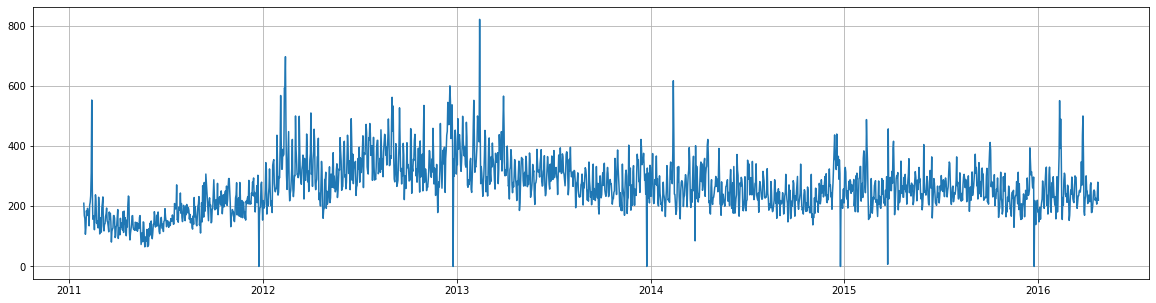

####################################################################################################
store_id: 6 & dept_id: 6


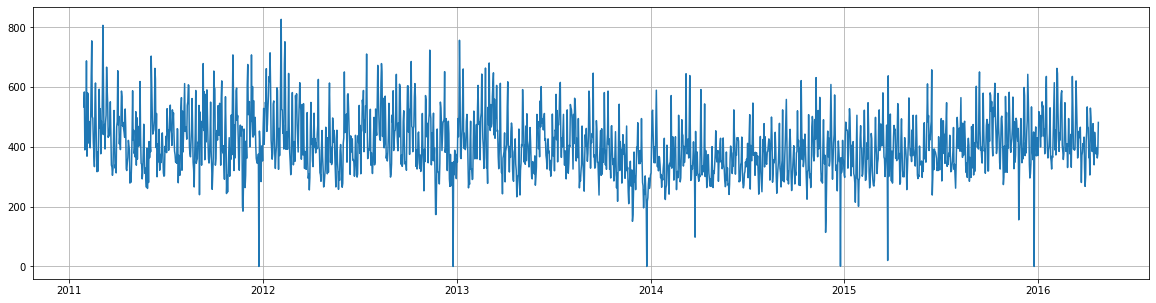

####################################################################################################
store_id: 6 & dept_id: 7


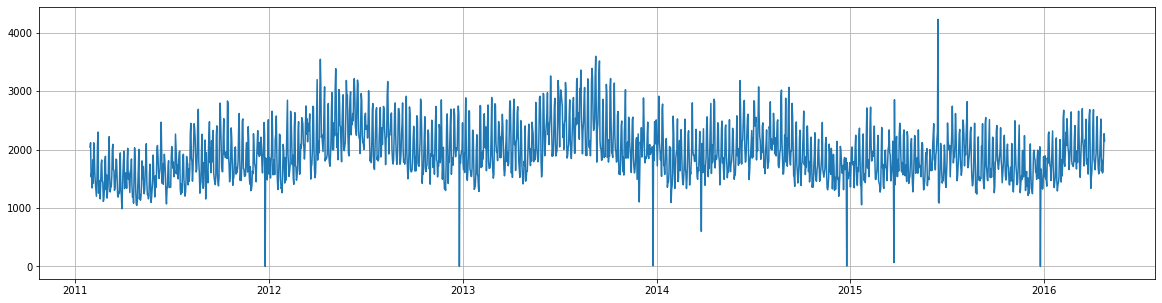

####################################################################################################
store_id: 7 & dept_id: 1


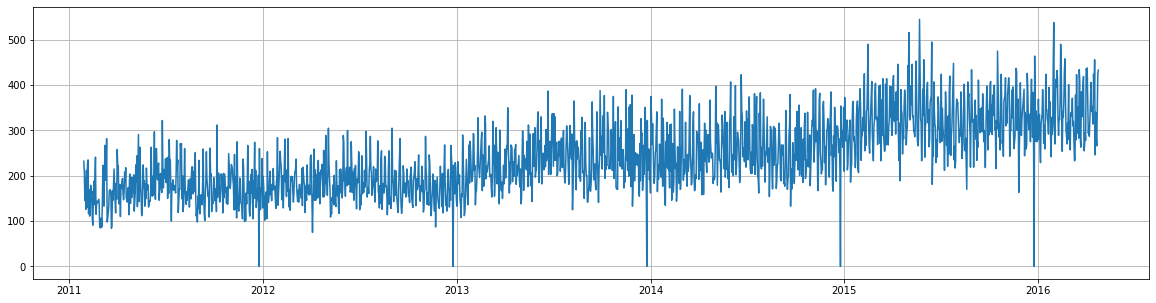

####################################################################################################
store_id: 7 & dept_id: 2


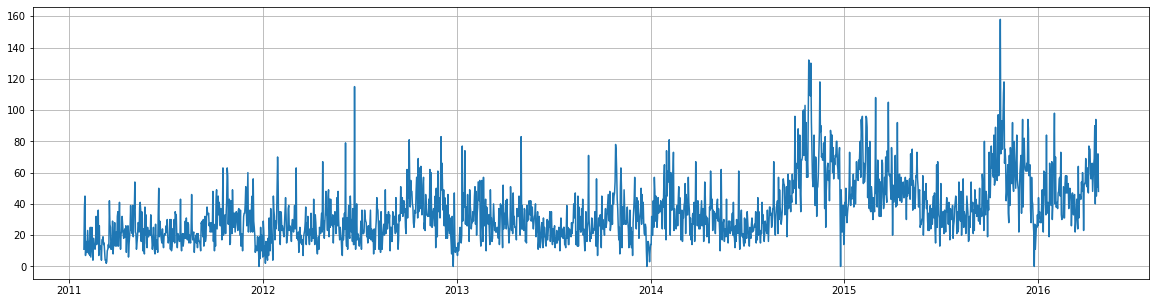

####################################################################################################
store_id: 7 & dept_id: 3


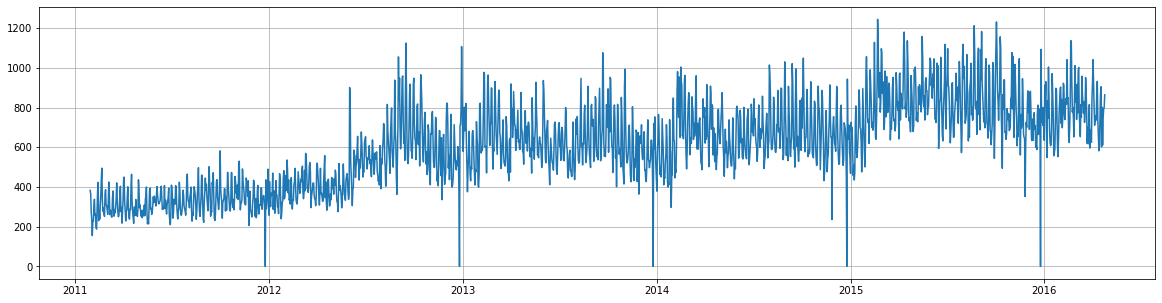

####################################################################################################
store_id: 7 & dept_id: 4


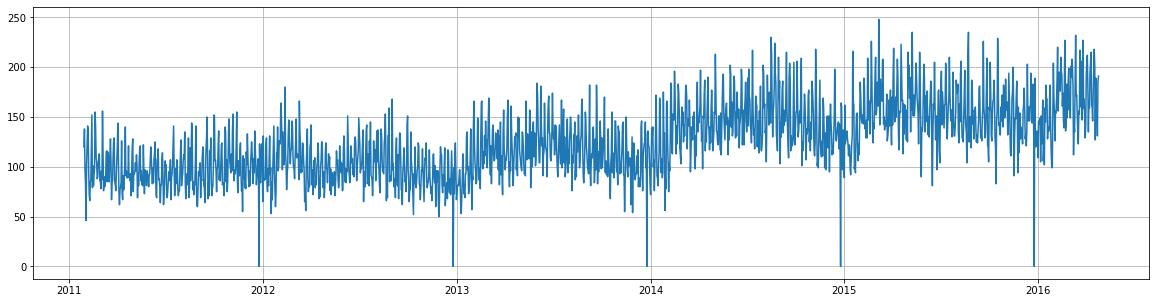

####################################################################################################
store_id: 7 & dept_id: 5


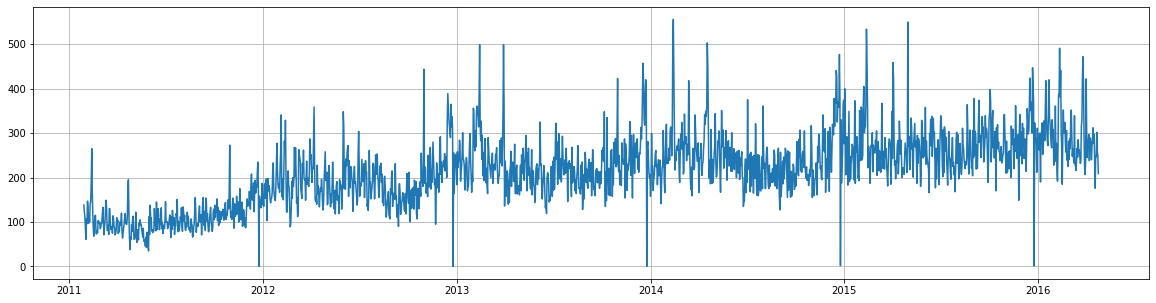

####################################################################################################
store_id: 7 & dept_id: 6


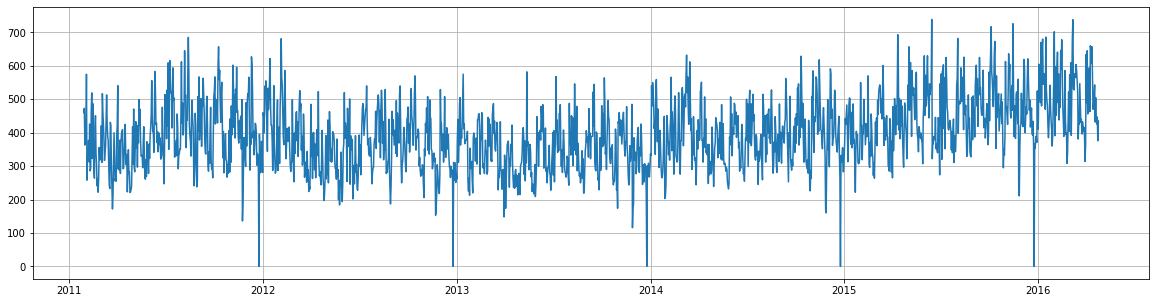

####################################################################################################
store_id: 7 & dept_id: 7


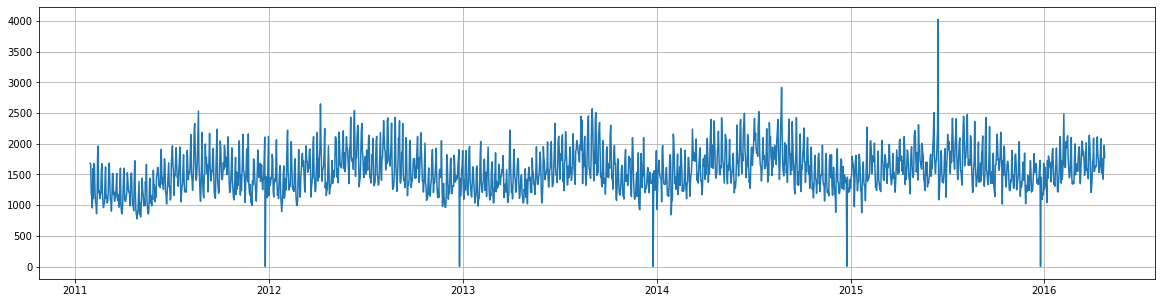

####################################################################################################
store_id: 8 & dept_id: 1


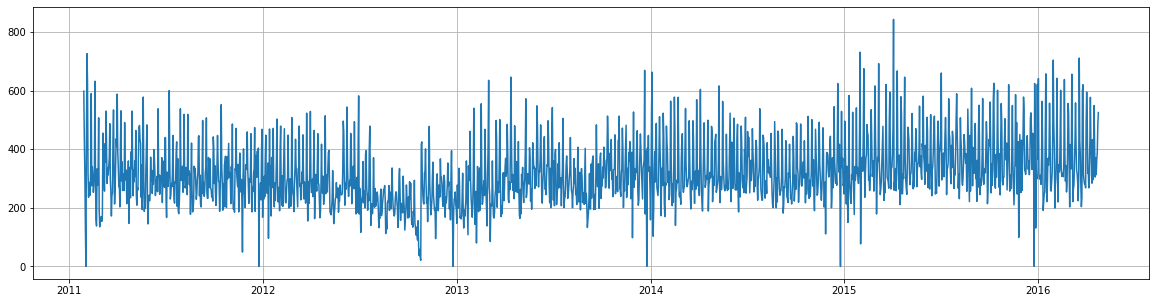

####################################################################################################
store_id: 8 & dept_id: 2


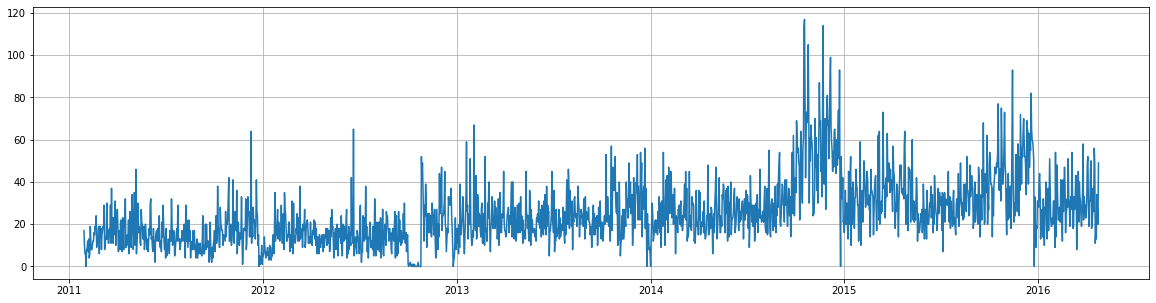

####################################################################################################
store_id: 8 & dept_id: 3


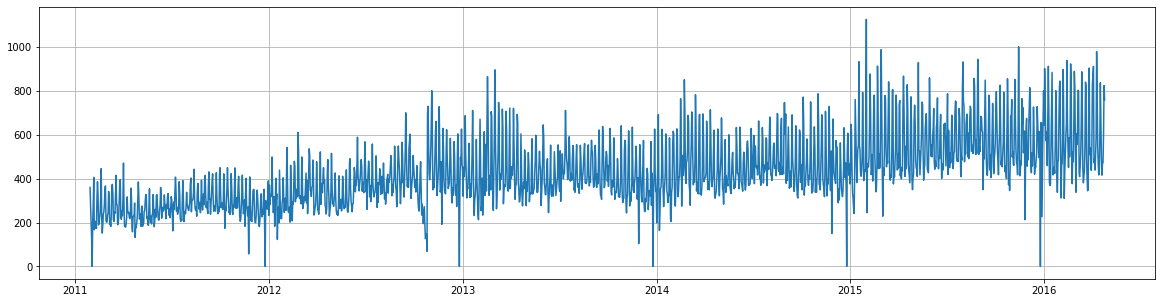

####################################################################################################
store_id: 8 & dept_id: 4


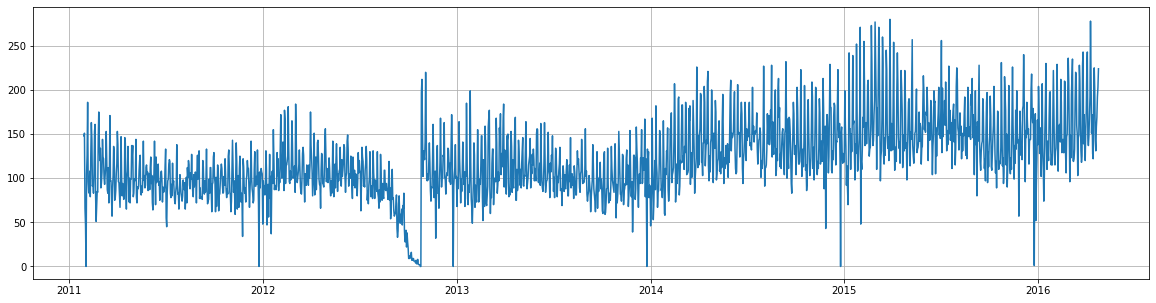

####################################################################################################
store_id: 8 & dept_id: 5


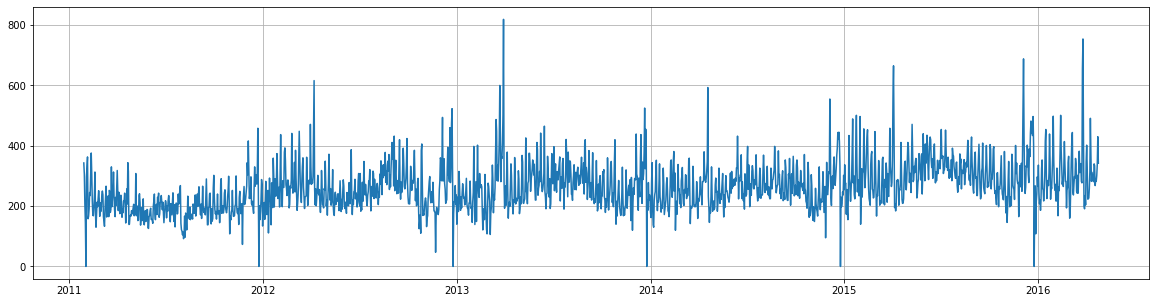

####################################################################################################
store_id: 8 & dept_id: 6


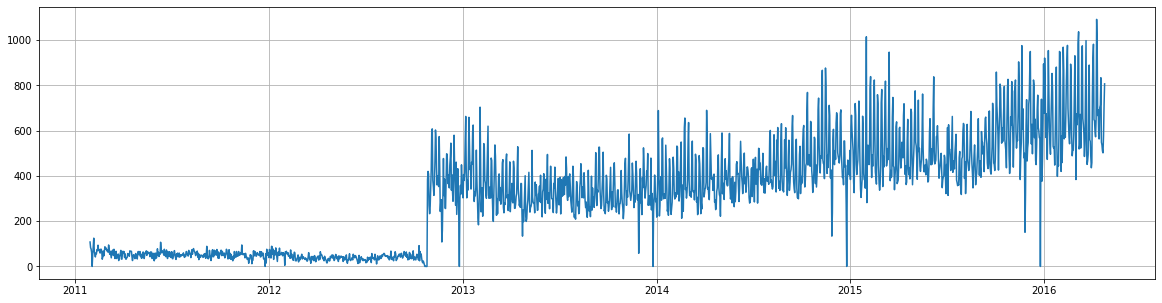

####################################################################################################
store_id: 8 & dept_id: 7


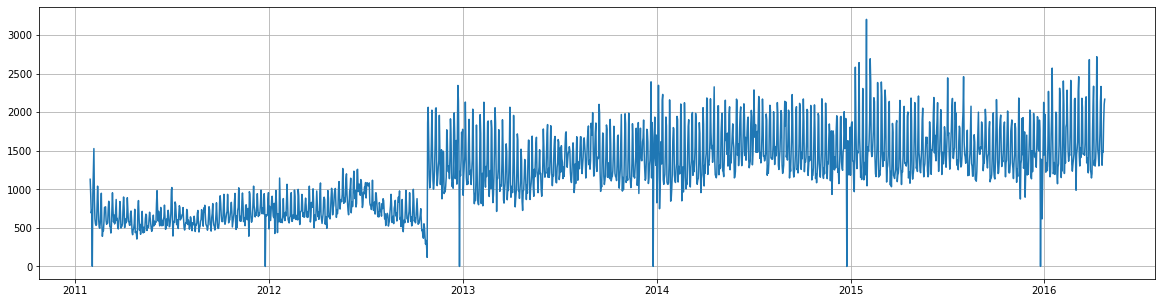

####################################################################################################
store_id: 9 & dept_id: 1


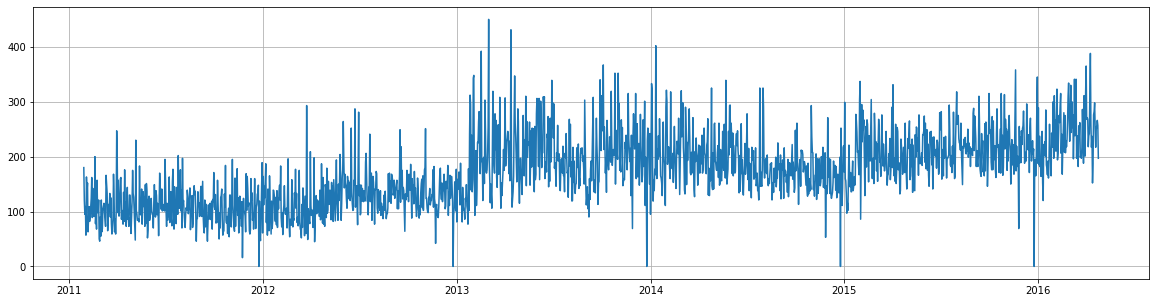

####################################################################################################
store_id: 9 & dept_id: 2


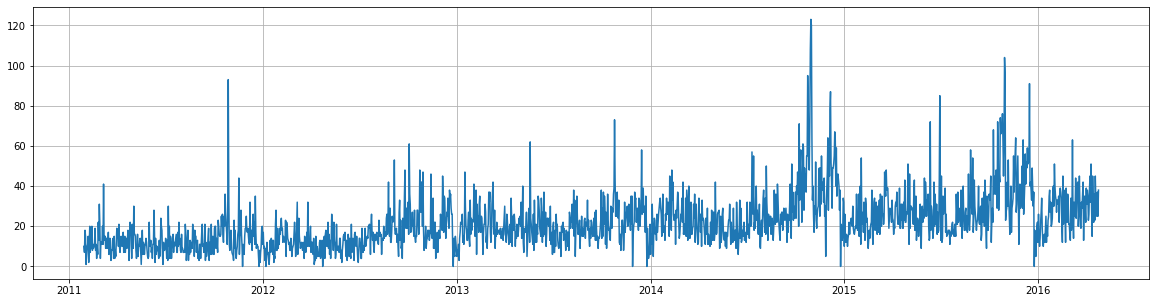

####################################################################################################
store_id: 9 & dept_id: 3


####################################################################################################
store_id: 9 & dept_id: 4


In [ ]:
for _,row in data.loc[:, ["store_id","dept_id"]].drop_duplicates().iterrows():
    print("#"*100)
    print(f"store_id: {row.store_id} & dept_id: {row.dept_id}")
    df = data.query("store_id==@row.store_id & dept_id==@row.dept_id")
    plt.figure(figsize=(20,5))
    plt.plot_date(df.ds, df.q, "-")
    plt.grid()
    plt.show()

***